### Apple trial model

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the prepared data
data = pd.read_csv("AAPL_prepared_data.csv")

# Create additional lagged features for SMA, EMA, and Close
lags = [5, 10, 15, 30]  # Lags to try
for lag in lags:
    data[f'Close_lag_{lag}'] = data['Close'].shift(lag)
    data[f'SMA_10_lag_{lag}'] = data['SMA_10'].shift(lag)
    data[f'EMA_10_lag_{lag}'] = data['EMA_10'].shift(lag)
    data[f'Close_pct_change_{lag}'] = data['Close'].pct_change(lag)

# Drop rows with NaN values due to lags
data.dropna(inplace=True)

# Define features and target
features = ['Close', 'SMA_10', 'SMA_50', 'SMA_200', 'EMA_10', 'EMA_50', 'RSI']
for lag in lags:
    features += [f'Close_lag_{lag}', f'SMA_10_lag_{lag}', f'EMA_10_lag_{lag}', f'Close_pct_change_{lag}']

target = 'Target'

# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Show the first few predicted values vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


RMSE: 3.43
R²: 0.96
         Actual   Predicted
851  181.881180  181.431365
852  183.702606  182.137692
853  182.436844  184.103162
854  185.656006  182.403562
855  186.802170  185.265801


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the prepared data
csv_path = r"C:/Users/Sezy/OneDrive/Personal_Trading_Algo/Jupyter_Files/top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Create additional lagged features for SMA, EMA, and Close
lags = [5, 10, 15, 30]  # Lags to try
for lag in lags:
    data[f'Close_lag_{lag}'] = data['Close'].shift(lag)
    data[f'SMA_10_lag_{lag}'] = data['SMA_10'].shift(lag)
    data[f'EMA_10_lag_{lag}'] = data['EMA_10'].shift(lag)
    data[f'Close_pct_change_{lag}'] = data['Close'].pct_change(lag)

# Drop rows with NaN values due to lags
data.dropna(inplace=True)

# Define features and target
features = ['Close', 'SMA_10', 'SMA_50', 'SMA_200', 'EMA_10', 'EMA_50']
for lag in lags:
    features += [f'Close_lag_{lag}', f'SMA_10_lag_{lag}', f'EMA_10_lag_{lag}', f'Close_pct_change_{lag}']

# Define your target (Adjust this based on the columns you have)
# Assuming you want to predict the 'Close' 30 days out
data['Target'] = data['Close'].shift(-30)

# Drop any rows with NaN values in the 'Target' column
data.dropna(subset=['Target'], inplace=True)

# Split the data into features (X) and target (y)
X = data[features]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Show the first few predicted values vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


RMSE: 31525.80
R²: 0.93
           Actual   Predicted
80033  212.899353  232.106902
80034  214.029007  239.866189
80035  215.969742  243.026350
80036  217.475967  245.548876
80037  217.437332  244.012816


In [6]:
data = data.dropna()

In [7]:
print(data.isna().sum())


Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Ticker                 0
RSI                    0
SMA_10                 0
SMA_50                 0
SMA_200                0
EMA_10                 0
EMA_50                 0
Close_lag_5            0
SMA_10_lag_5           0
EMA_10_lag_5           0
Close_pct_change_5     0
Close_lag_10           0
SMA_10_lag_10          0
EMA_10_lag_10          0
Close_pct_change_10    0
Close_lag_15           0
SMA_10_lag_15          0
EMA_10_lag_15          0
Close_pct_change_15    0
Close_lag_30           0
SMA_10_lag_30          0
EMA_10_lag_30          0
Close_pct_change_30    0
Target                 0
dtype: int64


In [15]:
import pandas as pd

data = pd.read_csv('C:/Users/Sezy/OneDrive/Personal_Trading_Algo/Jupyter_Files/top_100_stocks_2025_updated.csv')
print(data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker', 'RSI',
       'SMA_10', 'SMA_50', 'SMA_200', 'EMA_10', 'EMA_50'],
      dtype='object')


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [11]:
import pandas as pd

# Load the data
def load_data(csv_file):
    data = pd.read_csv(csv_file, parse_dates=['Date'])
    return data

# Test loading the data
csv_file = "C:/Users/Sezy/OneDrive/Personal_Trading_Algo/Jupyter_Files/top_100_stocks_2025_updated.csv"
data = load_data(csv_file)

# Print the first few rows to verify the data
data.head()


,Date,Open,High,Low,Close,Volume,Ticker,RSI,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,Dividends,Stock Splits,Capital Gains,Adj Close
0,2020-01-02 00:00:00-05:00,151.566880,153.428291,151.137325,153.323288,22622100.0,MSFT,NaN,NaN,NaN,NaN,153.323288,153.323288,NaN,NaN,NaN,NaN
1,2020-01-03 00:00:00-05:00,151.127749,152.683690,150.879551,151.414108,21116200.0,MSFT,0.000000,NaN,NaN,NaN,152.976164,153.248418,NaN,NaN,NaN,NaN
2,2020-01-06 00:00:00-05:00,149.944055,151.872293,149.399942,151.805466,20813700.0,MSFT,17.011567,NaN,NaN,NaN,152.763310,153.191832,NaN,NaN,NaN,NaN
3,2020-01-07 00:00:00-05:00,152.082331,152.416422,150.173188,150.421371,21634100.0,MSFT,10.621345,NaN,NaN,NaN,152.337503,153.083186,NaN,NaN,NaN,NaN
4,2020-01-08 00:00:00-05:00,151.710016,153.495074,150.774540,152.817322,27746500.0,MSFT,45.839492,NaN,NaN,NaN,152.424743,153.072760,NaN,NaN,NaN,NaN


In [12]:
# Clean the data by dropping unnecessary columns and handling NaN values
def clean_data(data):
    # Drop columns that aren't necessary for analysis or modeling
    columns_to_drop = ['Dividends', 'Stock Splits', 'Capital Gains', 'Adj Close']
    data_cleaned = data.drop(columns=columns_to_drop)
    
    # Handle any missing data (you can choose to fill or drop rows)
    # Here, we drop rows with NaN values (you can also choose to fill them)
    data_cleaned = data_cleaned.dropna()
    
    return data_cleaned

# Clean the data
data_cleaned = clean_data(data)

# Display the cleaned data
data_cleaned.head()


,Date,Open,High,Low,Close,Volume,Ticker,RSI,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50
199,2020-10-15 00:00:00-04:00,208.885997,212.022649,207.837226,211.349136,22733100.0,MSFT,63.430154,206.238097,203.882419,179.449973,207.860638,202.300090
200,2020-10-16 00:00:00-04:00,211.820588,213.879620,211.022004,211.349136,26057900.0,MSFT,62.034932,207.534132,203.956154,179.740102,208.494910,202.654954
201,2020-10-19 00:00:00-04:00,212.080363,213.889238,205.633862,206.114944,27625800.0,MSFT,57.611580,207.903603,203.999497,180.013606,208.062189,202.790640
202,2020-10-20 00:00:00-04:00,207.635170,209.145761,205.027697,206.528671,22753500.0,MSFT,55.013897,208.744536,204.132318,180.287222,207.783368,202.937230
203,2020-10-21 00:00:00-04:00,205.056544,208.712773,205.056544,206.672989,22724900.0,MSFT,52.846695,209.222731,204.361514,180.568480,207.581481,203.083730


In [19]:
def prepare_features_labels(data):
    # Convert 'Date' to datetime explicitly if it's not already
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    
    # Check if 'Date' has timezone info and handle accordingly
    if data['Date'].dt.tz is not None:
        data['Date'] = data['Date'].dt.tz_convert('UTC').dt.tz_localize(None)
    
    # Drop 'Date' and 'Ticker' columns since they aren't needed for the prediction
    X = data.drop(columns=['Date', 'Ticker', 'Close'])

    # Set 'Close' as the target variable
    y = data['Close']

    # Train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test

# Prepare features and labels
X_train, X_test, y_train, y_test = prepare_features_labels(data_cleaned)

# Check the resulting shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (79797, 10), X_test shape: (19950, 10)
y_train shape: (79797,), y_test shape: (19950,)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV


In [21]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 15403397709.56115
R^2 Score: -0.05625746476867133


In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print(f'Best parameters: {random_search.best_params_}')

# Predict with the best model
best_rf_model = random_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Squared Error: {mse_tuned}')
print(f'Tuned Model R^2 Score: {r2_tuned}')


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
csv_path = 'C:/Users/Sezy/OneDrive/Personal_Trading_Algo/Jupyter_Files/top_100_stocks_2025_updated.csv'
data = pd.read_csv(csv_path)

# Convert Date column to datetime (if needed)
data['Date'] = pd.to_datetime(data['Date'])

# Display first few rows to check the data
data.head()


C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\1891310786.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Open,High,Low,Close,Volume,Ticker,RSI,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,Dividends,Stock Splits,Capital Gains,Adj Close
0,2020-01-02 00:00:00-05:00,151.566880,153.428291,151.137325,153.323288,22622100.0,MSFT,NaN,NaN,NaN,NaN,153.323288,153.323288,NaN,NaN,NaN,NaN
1,2020-01-03 00:00:00-05:00,151.127749,152.683690,150.879551,151.414108,21116200.0,MSFT,0.000000,NaN,NaN,NaN,152.976164,153.248418,NaN,NaN,NaN,NaN
2,2020-01-06 00:00:00-05:00,149.944055,151.872293,149.399942,151.805466,20813700.0,MSFT,17.011567,NaN,NaN,NaN,152.763310,153.191832,NaN,NaN,NaN,NaN
3,2020-01-07 00:00:00-05:00,152.082331,152.416422,150.173188,150.421371,21634100.0,MSFT,10.621345,NaN,NaN,NaN,152.337503,153.083186,NaN,NaN,NaN,NaN
4,2020-01-08 00:00:00-05:00,151.710016,153.495074,150.774540,152.817322,27746500.0,MSFT,45.839492,NaN,NaN,NaN,152.424743,153.072760,NaN,NaN,NaN,NaN


In [38]:
# List of technical indicator columns (adjust if you have more)
tech_cols = ['RSI', 'SMA_10', 'SMA_50', 'SMA_200', 'EMA_10', 'EMA_50']

# Fill missing values in these columns with 0
for col in tech_cols:
    data[col] = data[col].fillna(0)

# Check again
data.head()


,Date,Open,High,Low,Close,Volume,Ticker,RSI,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,Dividends,Stock Splits,Capital Gains,Adj Close
0,2020-01-02 00:00:00-05:00,151.566880,153.428291,151.137325,153.323288,22622100.0,MSFT,0.000000,0.0,0.0,0.0,153.323288,153.323288,NaN,NaN,NaN,NaN
1,2020-01-03 00:00:00-05:00,151.127749,152.683690,150.879551,151.414108,21116200.0,MSFT,0.000000,0.0,0.0,0.0,152.976164,153.248418,NaN,NaN,NaN,NaN
2,2020-01-06 00:00:00-05:00,149.944055,151.872293,149.399942,151.805466,20813700.0,MSFT,17.011567,0.0,0.0,0.0,152.763310,153.191832,NaN,NaN,NaN,NaN
3,2020-01-07 00:00:00-05:00,152.082331,152.416422,150.173188,150.421371,21634100.0,MSFT,10.621345,0.0,0.0,0.0,152.337503,153.083186,NaN,NaN,NaN,NaN
4,2020-01-08 00:00:00-05:00,151.710016,153.495074,150.774540,152.817322,27746500.0,MSFT,45.839492,0.0,0.0,0.0,152.424743,153.072760,NaN,NaN,NaN,NaN


In [39]:
# Create target: next day's 'Close' per stock
data['Target'] = data.groupby('Ticker')['Close'].shift(-1)

# Drop rows where the Target is missing (usually the last row for each stock)
data.dropna(subset=['Target'], inplace=True)

# Check the updated data
data.head()


,Date,Open,High,Low,Close,Volume,Ticker,RSI,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,Dividends,Stock Splits,Capital Gains,Adj Close,Target
0,2020-01-02 00:00:00-05:00,151.566880,153.428291,151.137325,153.323288,22622100.0,MSFT,0.000000,0.0,0.0,0.0,153.323288,153.323288,NaN,NaN,NaN,NaN,151.414108
1,2020-01-03 00:00:00-05:00,151.127749,152.683690,150.879551,151.414108,21116200.0,MSFT,0.000000,0.0,0.0,0.0,152.976164,153.248418,NaN,NaN,NaN,NaN,151.805466
2,2020-01-06 00:00:00-05:00,149.944055,151.872293,149.399942,151.805466,20813700.0,MSFT,17.011567,0.0,0.0,0.0,152.763310,153.191832,NaN,NaN,NaN,NaN,150.421371
3,2020-01-07 00:00:00-05:00,152.082331,152.416422,150.173188,150.421371,21634100.0,MSFT,10.621345,0.0,0.0,0.0,152.337503,153.083186,NaN,NaN,NaN,NaN,152.817322
4,2020-01-08 00:00:00-05:00,151.710016,153.495074,150.774540,152.817322,27746500.0,MSFT,45.839492,0.0,0.0,0.0,152.424743,153.072760,NaN,NaN,NaN,NaN,154.726486


In [40]:
# One-hot encode the Ticker column
data_encoded = pd.get_dummies(data, columns=['Ticker'])

# Check the encoded columns (should see columns like Ticker_MSFT, Ticker_AAPL, etc.)
data_encoded.head()


,Date,Open,High,Low,Close,Volume,RSI,SMA_10,SMA_50,SMA_200,...,Ticker_TXN,Ticker_UBER,Ticker_UNH,Ticker_UPS,Ticker_V,Ticker_VZ,Ticker_WFC,Ticker_WMT,Ticker_XOM,Ticker_ZM
0,2020-01-02 00:00:00-05:00,151.566880,153.428291,151.137325,153.323288,22622100.0,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2020-01-03 00:00:00-05:00,151.127749,152.683690,150.879551,151.414108,21116200.0,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2020-01-06 00:00:00-05:00,149.944055,151.872293,149.399942,151.805466,20813700.0,17.011567,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2020-01-07 00:00:00-05:00,152.082331,152.416422,150.173188,150.421371,21634100.0,10.621345,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2020-01-08 00:00:00-05:00,151.710016,153.495074,150.774540,152.817322,27746500.0,45.839492,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [41]:
# Define base features (make sure these column names match your CSV)
features = ['Open', 'High', 'Low', 'Close', 'Volume'] + tech_cols

# Get a list of all dummy columns created for Ticker
ticker_dummy_cols = [col for col in data_encoded.columns if col.startswith('Ticker_')]

# Add ticker dummy columns to our feature list
features.extend(ticker_dummy_cols)

# Define feature matrix X and target vector y
X = data_encoded[features]
y = data_encoded['Target']

# Display shapes to ensure data is there
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (100023, 88)
y shape: (100023,)


In [42]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check split sizes
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 80018
Testing set size: 20005


In [43]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model using all tickers (Ticker as a feature)")
print("RMSE:", rmse)
print("R²:", r2)


Linear Regression Model using all tickers (Ticker as a feature)
RMSE: 3319.2089111303476
R²: 0.9992428229102485


In [53]:
def get_stock_data(ticker, data):
    # Filter the dataset to include only the selected stock
    stock_data = data[data['Ticker'] == ticker]
    return stock_data

# Example: Select MSFT
selected_ticker = 'MSFT'
stock_data = get_stock_data(selected_ticker, data)


In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Jupyter_Files\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter data for the selected stock (e.g., MSFT)
ticker = 'AAPL'  # This can be dynamic based on user input
stock_data = data[data['Ticker'] == ticker]

# Feature Engineering
# Create Simple Moving Averages (SMA)
stock_data['SMA_7'] = stock_data['Close'].rolling(window=7).mean()
stock_data['SMA_30'] = stock_data['Close'].rolling(window=30).mean()

# Calculate daily returns and rolling volatility (30-day)
stock_data['Returns'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Returns'].rolling(window=30).std()

# Shift the Close price by 30 days to predict the future price (target)
stock_data['Target'] = stock_data['Close'].shift(-100)

# Drop rows with missing values in the target column (NaN) and any NaNs in features
stock_data.dropna(subset=['Target', 'SMA_7', 'SMA_30', 'Volatility'], inplace=True)

# Select features: Close, Volume, Open, SMA_7, SMA_30, and Volatility
features = ['Close', 'Volume', 'Open', 'SMA_7', 'SMA_30', 'Volatility']
X = stock_data[features]
y = stock_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance for {ticker} (30 days ahead):")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\1191051174.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\1191051174.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_7'] = stock_data['Close'].rolling(window=7).mean()
C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\1191051174.py:21: SettingWithCopyWarning: 
A value is trying to be set on a c

Random Forest Model Performance for AAPL (30 days ahead):
RMSE: 8.260615808827627
R²: 0.9387133608830305


### Value of Stock Selected

In [78]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

# Load your dataset
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\CSV_FILES\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter data for the selected stock (e.g., MSFT)
ticker = 'AAPL'  # This can be dynamic based on user input
stock_data = data[data['Ticker'] == ticker]

# Feature Engineering
# Create Simple Moving Averages (SMA)
stock_data['SMA_7'] = stock_data['Close'].rolling(window=7).mean()
stock_data['SMA_30'] = stock_data['Close'].rolling(window=30).mean()

# Calculate daily returns and rolling volatility (30-day)
stock_data['Returns'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Returns'].rolling(window=30).std()

# Shift the Close price by 30 days to predict the future price (target)
stock_data['Target'] = stock_data['Close'].shift(-100)

# Drop rows with missing values in the target column (NaN) and any NaNs in features
stock_data.dropna(subset=['Target', 'SMA_7', 'SMA_30', 'Volatility'], inplace=True)

# Select features: Close, Volume, Open, SMA_7, SMA_30, and Volatility
features = ['Close', 'Volume', 'Open', 'SMA_7', 'SMA_30', 'Volatility']
X = stock_data[features]
y = stock_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model using pickle
model_filename = r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\random_forest_regressor_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(model, f)

# Make predictions (optional, just to check)
y_pred = model.predict(X_test)

# Calculate RMSE and R²
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance for {ticker} (30 days ahead):")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\1334249299.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\1334249299.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_7'] = stock_data['Close'].rolling(window=7).mean()
C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\1334249299.py:21: SettingWithCopyWarning: 
A value is trying to be set on a c

Random Forest Model Performance for AAPL (30 days ahead):
RMSE: 8.260615808827627
R²: 0.9387133608830305


In [79]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

# Load your dataset
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\CSV_FILES\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter data for the selected stock (e.g., MSFT)
ticker = 'AAPL'  # This can be dynamic based on user input
stock_data = data[data['Ticker'] == ticker]

# Feature Engineering
# Create Simple Moving Averages (SMA)
stock_data['SMA_7'] = stock_data['Close'].rolling(window=7).mean()
stock_data['SMA_30'] = stock_data['Close'].rolling(window=30).mean()

# Calculate daily returns and rolling volatility (30-day)
stock_data['Returns'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Returns'].rolling(window=30).std()

# Shift the Close price by 30 days to predict the future price (target)
stock_data['Target'] = stock_data['Close'].shift(-30)

# Drop rows with missing values in the target column (NaN) and any NaNs in features
stock_data.dropna(subset=['Target', 'SMA_7', 'SMA_30', 'Volatility'], inplace=True)

# Select features: Close, Volume, Open, SMA_7, SMA_30, and Volatility
features = ['Close', 'Volume', 'Open', 'SMA_7', 'SMA_30', 'Volatility']
X = stock_data[features]
y = stock_data['Target']

# Normalize the features (scaling them for better model performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance for {ticker} (30 days ahead):")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Save the model for use in Flask application
with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\random_forest_regressor_model.pkl', 'wb') as f:
    pickle.dump(model, f)


C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\2146990165.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\2146990165.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_7'] = stock_data['Close'].rolling(window=7).mean()
C:\Users\Sezy\AppData\Local\Temp\ipykernel_23368\2146990165.py:23: SettingWithCopyWarning: 
A value is trying to be set on a c

Random Forest Model Performance for AAPL (30 days ahead):
RMSE: 5.055983099050717
R²: 0.9834952142692271


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

# Load your dataset
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\CSV_FILES\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter data for the selected stock (e.g., AAPL)
ticker = 'AAPL'  # This can be dynamic based on user input
stock_data = data[data['Ticker'] == ticker]

# Feature Engineering
# Create Simple Moving Averages (SMA)
stock_data['SMA_7'] = stock_data['Close'].rolling(window=7).mean()
stock_data['SMA_30'] = stock_data['Close'].rolling(window=30).mean()

# Calculate daily returns and rolling volatility (30-day)
stock_data['Returns'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Returns'].rolling(window=30).std()

# Shift the Close price by 30 days to predict the future price (target)
stock_data['Target'] = stock_data['Close'].shift(-30)

# Drop rows with missing values in the target column (NaN) and any NaNs in features
stock_data.dropna(subset=['Target', 'SMA_7', 'SMA_30', 'Volatility'], inplace=True)

# Select features: Close, Volume, Open, SMA_7, SMA_30, and Volatility
features = ['Close', 'Volume', 'Open', 'SMA_7', 'SMA_30', 'Volatility']
X = stock_data[features]
y = stock_data['Target']

# Normalize the features (scaling them for better model performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance for {ticker} (30 days ahead):")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Save the model for use in Flask application
with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\random_forest_regressor_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler for use in Flask application
with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


C:\Users\Sezy\AppData\Local\Temp\ipykernel_14860\125396759.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\Sezy\AppData\Local\Temp\ipykernel_14860\125396759.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_7'] = stock_data['Close'].rolling(window=7).mean()
C:\Users\Sezy\AppData\Local\Temp\ipykernel_14860\125396759.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy

Random Forest Model Performance for AAPL (30 days ahead):
RMSE: 5.055983099050717
R²: 0.9834952142692271


In [3]:
print(stock_data.isnull().sum())  # Count missing values per column


Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Ticker              0
RSI                 0
SMA_10              0
SMA_50              0
SMA_200             0
EMA_10              0
EMA_50              0
Dividends        1240
Stock Splits     1240
Capital Gains    1240
Adj Close        1240
SMA_7               0
SMA_30              0
Returns             0
Volatility          0
Target              0
dtype: int64


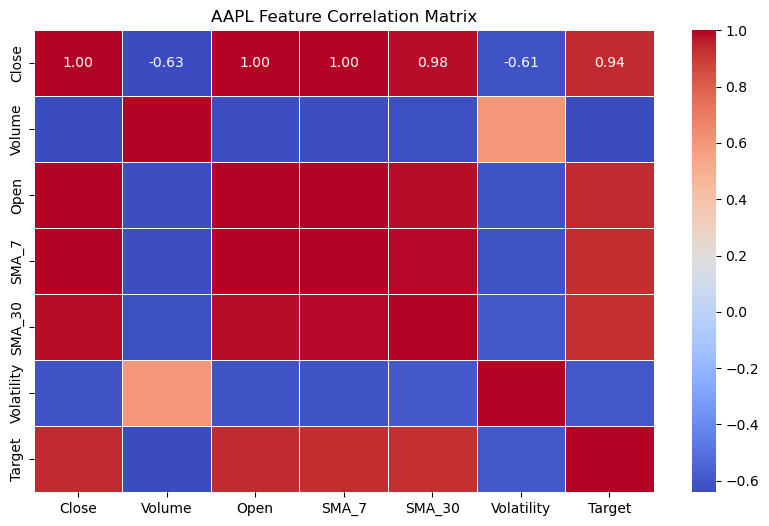

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_matrix = stock_data[['Close', 'Volume', 'Open', 'SMA_7', 'SMA_30', 'Volatility', 'Target']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"{ticker} Feature Correlation Matrix")
plt.show()


Chance of being % threshold above current stock price 

In [72]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load your stock data
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Jupyter_Files\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Feature Engineering
data['SMA_7'] = data['Close'].rolling(window=7).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['Returns'] = data['Close'].pct_change()
data['Volatility'] = data['Returns'].rolling(window=30).std()

# Shift the Close price by 30 days to predict future
data['Target'] = data['Close'].shift(-30)

# Drop rows with missing values
data.dropna(subset=['Target', 'SMA_7', 'SMA_30', 'Volatility'], inplace=True)

# Select features and target
features = ['Close', 'Volume', 'Open', 'SMA_7', 'SMA_30', 'Volatility']
X = data[features]
y = data['Target']

# Create binary targets for each threshold (2%, 4%, 6%, 8%, 10%)
thresholds = [0.02, 0.04, 0.06, 0.08, 0.10]
y_binary = {}
for threshold in thresholds:
    y_binary[threshold] = (y.pct_change(periods=30) >= threshold).astype(int)  # 1 if the stock rises above the threshold, else 0

# Train a Random Forest model for each threshold
models = {}
for threshold in thresholds:
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y_binary[threshold])
    models[threshold] = model

# Save the models to a file
with open('random_forest_models.pkl', 'wb') as f:
    pickle.dump(models, f)


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import pickle

# Load stock data
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\CSV_FILES\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Ensure there is a 'Ticker' column in the CSV that contains the stock ticker names
# Group by the 'Ticker' column for per-stock calculations
data['SMA_7'] = data.groupby('Ticker')['Close'].rolling(window=7).mean().reset_index(level=0, drop=True)
data['SMA_30'] = data.groupby('Ticker')['Close'].rolling(window=30).mean().reset_index(level=0, drop=True)
data['Returns'] = data.groupby('Ticker')['Close'].pct_change().reset_index(level=0, drop=True)
data['Volatility'] = data.groupby('Ticker')['Returns'].rolling(window=30).std().reset_index(level=0, drop=True)

# Shift the Close price by 30 days to predict the future price
data['Target'] = data.groupby('Ticker')['Close'].shift(-30)

# Drop rows with missing values in target or features
data.dropna(subset=['Target', 'SMA_7', 'SMA_30', 'Volatility'], inplace=True)

# Select features and target
features = ['Close', 'Volume', 'Open', 'SMA_7', 'SMA_30', 'Volatility']
X = data[features]
y_regression = data['Target']

# Train Regression Model for each stock
regression_models = {}
for ticker in data['Ticker'].unique():
    stock_data = data[data['Ticker'] == ticker]
    X_stock = stock_data[features]
    y_stock_regression = stock_data['Target']

    regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
    regression_model.fit(X_stock, y_stock_regression)
    
    regression_models[ticker] = regression_model

# Create binary targets for classification with thresholds for each stock
y_binary = {}
thresholds = [0.02, 0.04, 0.06, 0.08, 0.10]

# Train a Random Forest Classifier for each stock and each threshold
classification_models = {}
for ticker in data['Ticker'].unique():
    stock_data = data[data['Ticker'] == ticker]
    X_stock = stock_data[features]
    
    classification_models[ticker] = {}
    for threshold in thresholds:
        y_stock_binary = (stock_data['Target'].pct_change(periods=30) >= threshold).astype(int)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_stock, y_stock_binary)
        classification_models[ticker][threshold] = model

# Save the updated models
with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\random_forest_classification_models.pkl', 'wb') as f:
    pickle.dump(classification_models, f)

with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\random_forest_regression_models.pkl', 'wb') as f:
    pickle.dump(regression_models, f)

print("Updated models trained and saved successfully!")


Updated models trained and saved successfully!


### Testing the models

In [6]:
from sklearn.model_selection import train_test_split

# Train Regression Model for each stock with train-test split
regression_models = {}
for ticker in data['Ticker'].unique():
    stock_data = data[data['Ticker'] == ticker]
    X_stock = stock_data[features]
    y_stock_regression = stock_data['Target']

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_stock, y_stock_regression, test_size=0.2, random_state=42)

    # Train the model using the training set
    regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
    regression_model.fit(X_train, y_train)
    
    # Store the trained model
    regression_models[ticker] = regression_model

    # Optionally, evaluate on the test set
    y_pred = regression_model.predict(X_test)
    # Evaluate performance (e.g., calculate R^2 or RMSE if needed)



In [7]:
data.dropna(subset=['Target', 'SMA_7', 'SMA_30', 'Volatility'], inplace=True)
# Optionally, you might want to check for other missing data
data = data.dropna()  # This will remove rows with missing data in any column



In [8]:
data = data.sort_values(by=['Ticker', 'Date'])  # Sort by Ticker and Date


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

# Load stock data
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\CSV_FILES\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Sort by Ticker and Date to ensure correct rolling calculations
data = data.sort_values(by=['Ticker', 'Date'])

# Feature Engineering
data['SMA_7'] = data.groupby('Ticker')['Close'].rolling(window=7).mean().reset_index(level=0, drop=True)
data['SMA_30'] = data.groupby('Ticker')['Close'].rolling(window=30).mean().reset_index(level=0, drop=True)
data['Returns'] = data.groupby('Ticker')['Close'].pct_change().reset_index(level=0, drop=True)
data['Volatility'] = data.groupby('Ticker')['Returns'].rolling(window=30).std().reset_index(level=0, drop=True)

# Shift the Close price by 30 days to predict the future price
data['Target'] = data.groupby('Ticker')['Close'].shift(-30)

# Drop rows with missing values in target or features
data.dropna(subset=['Target', 'SMA_7', 'SMA_30', 'Volatility'], inplace=True)

# Select features and target
features = ['Close', 'Volume', 'Open', 'SMA_7', 'SMA_30', 'Volatility']
X = data[features]
y_regression = data['Target']

# Train Regression Model for each stock with train-test split
regression_models = {}
for ticker in data['Ticker'].unique():
    stock_data = data[data['Ticker'] == ticker]
    X_stock = stock_data[features]
    y_stock_regression = stock_data['Target']

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_stock, y_stock_regression, test_size=0.2, random_state=42)

    # Train the model using the training set
    regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
    regression_model.fit(X_train, y_train)
    
    # Store the trained model
    regression_models[ticker] = regression_model

    # Optionally, evaluate on the test set
    y_pred = regression_model.predict(X_test)
    # Evaluate performance (e.g., calculate R^2 or RMSE if needed)

# Create binary targets for classification with thresholds for each stock
y_binary = {}
thresholds = [0.02, 0.04, 0.06, 0.08, 0.10]

# Train a Random Forest Classifier for each stock and each threshold
classification_models = {}
for ticker in data['Ticker'].unique():
    stock_data = data[data['Ticker'] == ticker]
    X_stock = stock_data[features]
    
    classification_models[ticker] = {}
    for threshold in thresholds:
        y_stock_binary = (stock_data['Target'].pct_change(periods=30) >= threshold).astype(int)

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_stock, y_stock_binary, test_size=0.2, random_state=42)

        # Train the model using the training set
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Store the model
        classification_models[ticker][threshold] = model

        # Optionally evaluate the model on the test set
        y_pred = model.predict(X_test)
        # Calculate performance metrics (e.g., accuracy, F1-score) if needed

# Save the updated models
with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\random_forest_classification_models.pkl', 'wb') as f:
    pickle.dump(classification_models, f)

with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\random_forest_regression_models.pkl', 'wb') as f:
    pickle.dump(regression_models, f)

print("Updated models trained and saved successfully!")


Updated models trained and saved successfully!


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load stock data
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\CSV_FILES\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Ensure 'Date' is in datetime format and sorted by 'Ticker' and 'Date'
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Ticker', 'Date'], inplace=True)

# Create target column for predicting the Close price 30 days ahead
data['Target'] = data.groupby('Ticker')['Close'].shift(-30)

# Drop rows with missing values for target column
data.dropna(subset=['Target'], inplace=True)

# Select only relevant features (Open, High, Low, Close, Volume)
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Split data into X (features) and y (target)
X = data[features]
y = data['Target']

# Train-test split: time series (no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Save the model for later use
with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\stock_price_predictor_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model trained, evaluated, and saved successfully!")


C:\Users\Sezy\AppData\Local\Temp\ipykernel_26264\710291722.py:13: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'])


RMSE: 29.1242
R²: 0.9625
Model trained, evaluated, and saved successfully!


In [14]:
import pandas as pd

# Load stock data
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\CSV_FILES\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter for Apple's (AAPL) data and get the most recent entry
apple_data = data[data['Ticker'] == 'AAPL'].sort_values(by='Date', ascending=False).iloc[0]

print("Latest Apple data:")
print(apple_data)


Latest Apple data:
Date             2025-03-04 00:00:00-05:00
Open                            237.710007
High                            240.070007
Low                             234.679993
Close                           235.929993
Volume                          53798100.0
Ticker                                AAPL
RSI                              54.655409
SMA_10                          242.384999
SMA_50                          239.431245
SMA_200                         225.934488
EMA_10                          240.070067
EMA_50                           238.08657
Dividends                              NaN
Stock Splits                           NaN
Capital Gains                          NaN
Adj Close                              NaN
SMA_7                                  NaN
SMA_30                                 NaN
Name: 2597, dtype: object


C:\Users\Sezy\AppData\Local\Temp\ipykernel_26264\198751195.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'])


In [15]:
import pickle

# Load the trained model
with open(r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\stock_price_predictor_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Prepare the features (Open, High, Low, Close, Volume) from the most recent data
apple_features = apple_data[['Open', 'High', 'Low', 'Close', 'Volume']].values.reshape(1, -1)

# Make the prediction for 30 days ahead
predicted_price = model.predict(apple_features)

print(f"Predicted Apple price 30 days ahead: {predicted_price[0]}")


Predicted Apple price 30 days ahead: 242.22574157714843


c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


C:\Users\Sezy\AppData\Local\Temp\ipykernel_26264\2705889663.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'])


                             Date  Actual Price  Predicted Price
2539    2024-12-05 00:00:00-05:00    223.584167       230.560798
2540    2024-12-06 00:00:00-05:00    223.414368       228.763659
2541    2024-12-09 00:00:00-05:00    222.535324       231.045179
2542    2024-12-10 00:00:00-05:00    229.607544       234.928350
2543    2024-12-11 00:00:00-05:00    237.998322       241.839875
2544    2024-12-12 00:00:00-05:00    239.097122       240.651422
2545    2024-12-13 00:00:00-05:00    237.329056       240.462634
2546    2024-12-16 00:00:00-05:00    235.740814       238.424508
2547    2024-12-17 00:00:00-05:00    227.759583       238.146764
2548    2024-12-18 00:00:00-05:00    232.544327       239.859013
2549    2024-12-19 00:00:00-05:00    232.214691       238.427703
2550    2024-12-20 00:00:00-05:00    232.963867       245.722415
2551    2024-12-23 00:00:00-05:00    227.380005       236.769784
2552    2024-12-24 00:00:00-05:00    227.649994       241.654249
2553    2024-12-26 00:00:

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2024-12-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-09 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-10 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-11 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-12 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-16 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-17 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-18 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-19 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-20 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-23 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-24 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-26 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-30 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2024-12-31 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-02 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-03 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-08 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-10 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-14 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-15 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-16 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-17 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-21 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-22 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-23 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-24 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-28 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-29 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-30 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-01-31 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-03 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-04 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-05 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-06 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-07 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-10 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-11 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-12 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-13 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-14 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-18 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-19 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-20 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-21 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-24 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-25 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-26 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-27 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-02-28 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-03-03 00:00:00-0500', tz='UTC-05:00'),
       Timestamp('2025-03-04 00:00:00-0500', tz='UTC-05:00'), NaT],
      dtype=object)

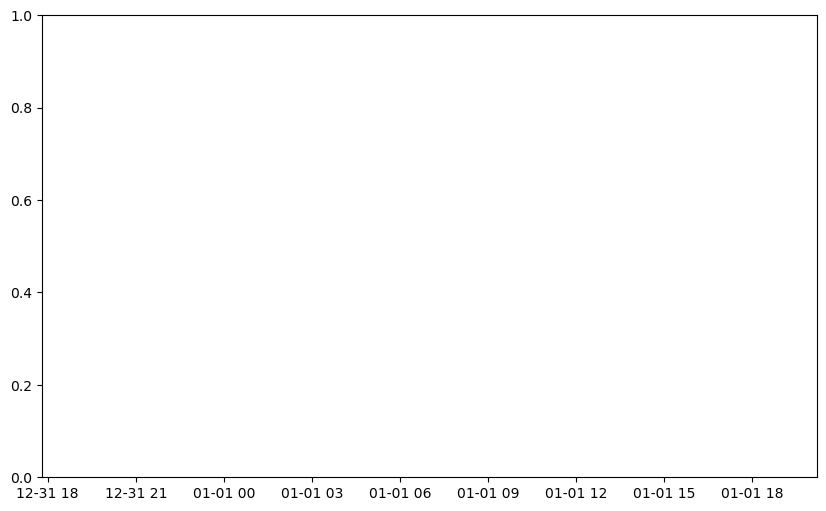

In [13]:
import pandas as pd
import pickle

# Load the saved model
model_path = r'C:\Users\Sezy\OneDrive\Personal_Trading_Algo\Saved_Models\stock_price_predictor_model.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Load the stock data (the same dataset you used for training)
csv_path = r"C:\Users\Sezy\OneDrive\Personal_Trading_Algo\CSV_FILES\top_100_stocks_2025_updated.csv"
data = pd.read_csv(csv_path)

# Ensure 'Date' is in datetime format and sorted by 'Ticker' and 'Date'
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Ticker', 'Date'], inplace=True)

# Manually create the 'Target' column for predicting the Close price 30 days ahead (same as during training)
data['Target'] = data.groupby('Ticker')['Close'].shift(-30)

# Select some recent data (for a stock of your choice, e.g., "AAPL")
stock_data = data[data['Ticker'] == 'AAPL'].tail(60)  # Take the last 60 days of data

# Select the features (Open, High, Low, Close, Volume)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X_test = stock_data[features]

# Get actual prices (the "Target" for comparison)
actual_prices = stock_data['Target'].values

# Predict the target values (30 days ahead)
predictions = model.predict(X_test)

# Display actual vs predicted prices
comparison_df = pd.DataFrame({
    'Date': stock_data['Date'].tail(60),
    'Actual Price': actual_prices,
    'Predicted Price': predictions
})

# Print comparison
print(comparison_df)

# Optionally, plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Date'], comparison_df['Actual Price'], label='Actual Price', color='blue')
plt.plot(comparison_df['Date'], comparison_df['Predicted Price'], label='Predicted Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices for AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
